- 합성곱 신경망을 이용한 문장 분류(classification)

In [34]:
from tensorflow.keras.models     import Sequential , Model
from tensorflow.keras.layers     import Activation , Dense , BatchNormalization , Dropout ,Flatten, Conv1D, MaxPooling1D, Embedding, Conv2D, MaxPooling2D , AveragePooling2D , GlobalMaxPooling2D , ZeroPadding2D , Input, Reshape, Concatenate
from tensorflow.keras.optimizers import SGD , Adam , RMSprop
from tensorflow.keras.utils      import plot_model , to_categorical
from tensorflow.keras.callbacks  import EarlyStopping , ModelCheckpoint

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences


from sklearn.model_selection     import train_test_split
from sklearn.preprocessing       import StandardScaler , MinMaxScaler , LabelEncoder
from sklearn.model_selection     import KFold
from sklearn.ensemble            import VotingClassifier
from sklearn.metrics             import accuracy_score



import matplotlib.pyplot as plt

import pandas  as pd
import numpy   as np
import seaborn as sns

# dataset
from tensorflow.keras.datasets   import imdb


# from tensorflow.keras.datasets.mnist import load_data
# from tensorflow.keras.datasets.fashion_mnist import load_data
# from sklearn.datasets            import load_breast_cancer

# from sklearn.datasets            import load_digits

In [16]:
(X_train, y_train),(X_test, y_test) = imdb.load_data(num_words=3000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [17]:
# X, y 길이 맞추기

X_train = pad_sequences(X_train, maxlen= 300)
X_test = pad_sequences(X_test, maxlen= 300)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25000, 300), (25000, 300), (25000,), (25000,))

In [18]:
# 1-D Conv

def sentence_cnn_1d() :
  model = Sequential()

  # feature extraction

  model.add(Embedding(input_dim=3000, output_dim=100, input_length=300))
  model.add(Conv1D(filters=50, kernel_size=5, strides=1, padding='valid'))
  model.add(MaxPooling1D(2, padding='valid'))
  model.add(Flatten())

  # classification
  
  model.add(Dense(10))
  model.add(Activation('relu'))

  # output

  model.add(Dense(1)) # y가 0 또는 1 이기 때문
  model.add(Activation('sigmoid'))

  adam = Adam(lr=0.001)
  model.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
  


  return model

In [19]:
model = sentence_cnn_1d()

In [20]:
history = model.fit(X_train, y_train, batch_size=50, validation_split = 0.2, epochs=7, verbose=1)

Epoch 1/7
400/400 [==============================] - 6s 13ms/step - loss: 0.6051 - accuracy: 0.5958 - val_loss: 0.3043 - val_accuracy: 0.8726
Epoch 2/7
400/400 [==============================] - 5s 12ms/step - loss: 0.2370 - accuracy: 0.9075 - val_loss: 0.3053 - val_accuracy: 0.8724
Epoch 3/7
400/400 [==============================] - 5s 13ms/step - loss: 0.1180 - accuracy: 0.9609 - val_loss: 0.3671 - val_accuracy: 0.8672
Epoch 4/7
400/400 [==============================] - 5s 12ms/step - loss: 0.0276 - accuracy: 0.9940 - val_loss: 0.4886 - val_accuracy: 0.8592
Epoch 5/7
400/400 [==============================] - 5s 12ms/step - loss: 0.0059 - accuracy: 0.9996 - val_loss: 0.5799 - val_accuracy: 0.8622
Epoch 6/7
400/400 [==============================] - 5s 12ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.6354 - val_accuracy: 0.8644
Epoch 7/7
400/400 [==============================] - 5s 12ms/step - loss: 4.0525e-04 - accuracy: 1.0000 - val_loss: 0.6727 - val_accuracy: 0.8656


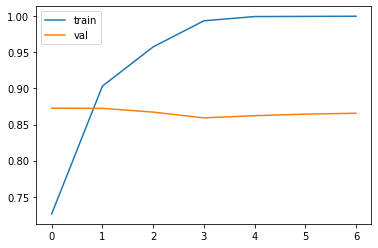

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'],loc="best")
plt.show()

In [23]:
result = model.evaluate(X_test, y_test)
print("accuracy : ", result[1])

782/782 [==============================] - 3s 4ms/step - loss: 0.6577 - accuracy: 0.8655
accuracy :  0.8654800057411194


- 2D로 실행

In [27]:
# 2-D Conv

def sentence_cnn_2d() :
  model = Sequential()

  # feature extraction

  model.add(Embedding(input_dim=3000, output_dim=100, input_length=300))
  model.add(Reshape( (300, 100, 1), input_shape=(300, 100)) )

  model.add(Conv2D(filters=50, kernel_size=(5,100), strides=(1,1), padding='valid'))
  model.add( GlobalMaxPooling2D() ) # flatten을 자동 처리

  # classification
  
  model.add(Dense(10))
  model.add(Activation('relu'))
  model.add(Dropout(0.3))

  # output

  model.add(Dense(1)) # y가 0 또는 1 이기 때문
  model.add(Activation('sigmoid'))

  adam = Adam(lr=0.001)
  model.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
  


  return model

In [28]:
model = sentence_cnn_2d()

In [29]:
history = model.fit(X_train, y_train, batch_size=50, validation_split = 0.2, epochs=10, verbose=1)

Epoch 1/10
400/400 [==============================] - 8s 19ms/step - loss: 0.6027 - accuracy: 0.6499 - val_loss: 0.3502 - val_accuracy: 0.8516
Epoch 2/10
400/400 [==============================] - 8s 19ms/step - loss: 0.3157 - accuracy: 0.8756 - val_loss: 0.3035 - val_accuracy: 0.8740
Epoch 3/10
400/400 [==============================] - 7s 19ms/step - loss: 0.2269 - accuracy: 0.9188 - val_loss: 0.3091 - val_accuracy: 0.8720
Epoch 4/10
400/400 [==============================] - 7s 19ms/step - loss: 0.1618 - accuracy: 0.9481 - val_loss: 0.3303 - val_accuracy: 0.8746
Epoch 5/10
400/400 [==============================] - 7s 19ms/step - loss: 0.1071 - accuracy: 0.9678 - val_loss: 0.3633 - val_accuracy: 0.8736
Epoch 6/10
400/400 [==============================] - 7s 19ms/step - loss: 0.0698 - accuracy: 0.9807 - val_loss: 0.4292 - val_accuracy: 0.8704
Epoch 7/10
400/400 [==============================] - 8s 19ms/step - loss: 0.0453 - accuracy: 0.9873 - val_loss: 0.4860 - val_accuracy: 0.8726

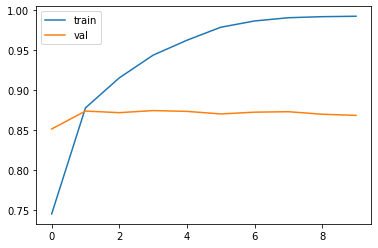

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'],loc="best")
plt.show()

In [31]:
result = model.evaluate(X_test, y_test)
print("accuracy : ", result[1])

782/782 [==============================] - 7s 8ms/step - loss: 0.6868 - accuracy: 0.8670
accuracy :  0.8670399785041809


#### 배치정규화

In [45]:
# 2-D Conv

# 합성곱 연산을 적용하는 레이어를 여러 개 만들어서 성능을 개선
def conv_ary() :
  conv_layer_ary = []
  inp = Input(shape=(30,100,1))

  size = [2,3,4,5]
  for s in size :

    conv = Conv2D(filters=100, kernel_size=(s,100), strides=(1,1), padding='valid')(inp)
    act = Activation('relu')(conv)
    pool = MaxPooling2D(pool_size=(300-s+1,1),padding='valid')(act)
    conv_layer_ary.append(pool)

  out = concatenate(conv_layer_ary)
  model = Model(inputs = inp, outputs = out)

  return model

def improve_sentence_cnn_2d() :
  model = Sequential()

  # feature extraction

  model.add(Embedding(input_dim=3000, output_dim=100, input_length=300))
  model.add(Reshape( (300, 100, 1), input_shape=(300, 100)) )
  # model.Dropout(0.5)

  model.add(conv_ary())
  # model.add(Conv2D(filters=50, kernel_size=(5,100), strides=(1,1), padding='valid'))
  # model.add( MaxPooling2D())

  model.add(Flatten())

  # classification
  
  model.add(Dense(10))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.3))

  # output

  model.add(Dense(1)) # y가 0 또는 1 이기 때문
  model.add(Activation('sigmoid'))

  adam = Adam(lr=0.001)
  model.compile(loss='binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
  


  return model

In [46]:
model = improve_sentence_cnn_2d()

ValueError: ignored

In [23]:
callbacks = [EarlyStopping(moniter='val_accuracy', patience=3)]
history = model.fit(X_train, y_train, batch_size=50, validation_split = 0.2, epochs=10, verbose=1, callbacks=callbacks)

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'val'],loc="best")
plt.show()

In [23]:
result = model.evaluate(X_test, y_test)
print("accuracy : ", result[1])